
This script run the EcoMotionZip on videos and records the data

### Import test video database from the directory and get video characteristics

In [1]:
import pandas as pd
import os
from moviepy.editor import VideoFileClip

rename_info = pd.read_csv('./testing/test_video_renames.csv')

In [3]:

def get_video_info(directory):
    video_info = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
                file_path = os.path.join(root, file)
                video = VideoFileClip(file_path)
                duration = video.duration
                fps = video.fps
                resolution = video.size
                file_size = os.path.getsize(file_path)
                frame_count = video.reader.nframes
                video_info.append({
                    "Video Name": file, 
                    "file_size": file_size,
                    "duration": duration,
                    "frame_count": frame_count,
                    "fps": fps,
                    "resolution": resolution
                    
                })
    return pd.DataFrame(video_info)

directory = "./testing/test_videos"
video_data = get_video_info(directory)
video_data['file_size'] = video_data['file_size'] / 1048576

for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    video_data.loc[video_data['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
video_data.insert(1, 'Dataset', video_data['Video Name'].str.split('_').str[0])

video_data

,Video Name,Dataset,file_size,duration,frame_count,fps,resolution
0,Ratnayake2022_V9,Ratnayake2022,1259.698936,600.13,18004,30.0,"[1920, 1080]"
1,Ratnayake2022_V8,Ratnayake2022,942.189533,598.37,17952,30.0,"[1920, 1080]"
2,Ratnayake2022_V3,Ratnayake2022,1236.242653,600.13,18004,30.0,"[1920, 1080]"
3,Ratnayake2022_V7,Ratnayake2022,977.497154,600.13,18004,30.0,"[1920, 1080]"
4,Ratnayake2022_V6,Ratnayake2022,1024.718670,600.07,18003,30.0,"[1920, 1080]"
5,Ratnayake2022_V4,Ratnayake2022,899.098175,598.63,17959,30.0,"[1920, 1080]"
6,Ratnayake2022_V10,Ratnayake2022,966.772497,600.10,18004,30.0,"[1920, 1080]"
7,Ratnayake2022_V1,Ratnayake2022,1205.925222,598.90,17968,30.0,"[1920, 1080]"
8,Ratnayake2022_V2,Ratnayake2022,1258.126583,600.40,18013,30.0,"[1920, 1080]"
9,Ratnayake2022_V5,Ratnayake2022,1124.785391,600.00,18001,30.0,"[1920, 1080]"


In [11]:
# Import energy consumption data from the csv files in the Energy_Tests folder. The csv files are named after the video dataset  they were recorded with. csv file has 4 columns: Time, Rep1, Rep2, Rep3. Each column contains the energy consumption data for each repetition of the video dataset.

energy_data = pd.DataFrame()
for root, dirs, files in os.walk("./EnergyTests"):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            file_path = os.path.join(root, file)
            # Import the csv file to a new dataframe
            energy_data_temp = pd.read_csv(file_path)

            # Remove the column with the time data
            energy_data_temp = energy_data_temp.drop(columns=['Time'])

            # Rename the columns to the name of the video dataset_Rep1, video dataset_Rep2, video dataset_Rep3
            energy_data_temp = energy_data_temp.rename(columns=lambda x: file.split('.')[0] + '_' + x)

            # Add the data to the energy_data dataframe
            energy_data = pd.concat([energy_data, energy_data_temp], axis=1)

energy_data



RPi4_vanderVoort2022.csv
RPi5_vanderVoort2022.csv
RPi4_Naqvi2022.csv
RPi5_Ratnayake2021.csv
RPi5_Ratnayake2023.csv
RPi4_Ratnayake2021.csv
RPi4_Ratnayake2023.csv
RPi4_JamesCook.csv
RPi4_PICT.csv
RPi5_Naqvi2022.csv


,RPi4_vanderVoort2022_Rep1,RPi4_vanderVoort2022_Rep2,RPi4_vanderVoort2022_Rep3,RPi5_vanderVoort2022_Rep1,RPi5_vanderVoort2022_Rep2,RPi5_vanderVoort2022_Rep3,RPi4_Naqvi2022_Rep1,RPi4_Naqvi2022_Rep2,RPi4_Naqvi2022_Rep3,RPi5_Ratnayake2021_Rep1,...,RPi4_Ratnayake2023_Rep3,RPi4_JamesCook_Rep1,RPi4_JamesCook_Rep2,RPi4_JamesCook_Rep3,RPi4_PICT_Rep1,RPi4_PICT_Rep2,RPi4_PICT_Rep3,RPi5_Naqvi2022_Rep1,RPi5_Naqvi2022_Rep2,RPi5_Naqvi2022_Rep3
0,1.200599,1.059842,1.255017,1.876205,2.366343,3.070442,1.118498,1.246439,1.256817,1.391672,...,1.301049,1.140150,1.239876,1.239876,0.657739,1.186792,1.237039,1.047667,3.259991,2.241444
1,2.260397,1.203713,1.363565,4.025047,2.326688,3.996782,1.179764,1.290026,1.256195,3.120791,...,1.301049,1.130877,1.223963,1.223963,1.170755,2.218243,1.247419,1.709627,3.797396,3.803537
2,2.943469,1.203092,2.847761,4.023748,3.746303,3.634585,2.338720,1.266783,1.531081,2.901740,...,1.278389,1.132784,1.223908,1.223908,0.892654,2.629811,2.702836,1.698671,3.793613,3.797226
3,2.620260,2.892155,2.847761,3.638228,3.675315,4.280515,2.789285,2.931315,3.021797,3.357985,...,2.779525,2.360938,2.730901,2.730901,0.892097,2.628016,2.700099,1.022900,4.082198,3.890019
4,2.626559,2.972011,2.789552,4.323909,4.208971,4.264336,2.786516,2.641716,2.729391,3.342827,...,2.765087,2.465697,2.711312,2.711312,0.734737,2.358334,2.501118,3.429394,4.305608,4.297286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Create a new dataframe to summarize and analyse the energy consumption data for each video dataset.
# The new dataframe will have 6 columns: Device, Dataset , Repetition, Time, Average_power and Power_consumption_Wh.
# The Device column will contain the name of the device the energy consumption data was recorded with.
# The Dataset column will contain the name of the video dataset.
# The Repetition column will contain the repetition number of the video dataset.
# The Time column will contain the time in seconds. This is the number of data points in the energy consumption data.
# The Average_power column will contain the average power consumption in Watts.
# The Power_consumption_Wh column will contain the total power consumption in Watt-hours. Calculated by multiplying the average power by the time in seconds/3600.

energy_data_summary = pd.DataFrame()

for col in energy_data:
    device_name = col.split('_')[0]
    dataset_name = col.split('_')[1]
    repetition = col.split('_')[2]
    _time = len(energy_data[col].dropna().tolist())
    _avg_power = energy_data[col].dropna().mean()
    _energy_consumption = (_avg_power * _time) / 3600

    energy_data_temp = pd.DataFrame({
        "Device": device_name,
        "Dataset": dataset_name,
        "Repetition": repetition,
        "Time": _time,
        "Average_power": _avg_power,
        "Power_consumption_Wh": _energy_consumption,
        "Power_consumption_mWh": _energy_consumption*1000
        
    }, index=[0])

    energy_data_summary = pd.concat([energy_data_summary, energy_data_temp], axis=0)

energy_data_summary = energy_data_summary.reset_index(drop=True)

energy_data_summary.loc[energy_data_summary['Dataset'] == 'JamesCook', 'Dataset'] = 'NestMonitoring'
energy_data_summary.loc[energy_data_summary['Dataset'] == 'Ratnayake2023', 'Dataset'] = 'Ratnayake2022'

energy_data_summary





,Device,Dataset,Repetition,Time,Average_power,Power_consumption_Wh,Power_consumption_mWh
0,RPi4,vanderVoort2022,Rep1,61,2.895380,0.049061,49.060599
1,RPi4,vanderVoort2022,Rep2,61,2.909209,0.049295,49.294930
2,RPi4,vanderVoort2022,Rep3,61,2.871063,0.048649,48.648562
3,RPi5,vanderVoort2022,Rep1,36,4.341530,0.043415,43.415296
4,RPi5,vanderVoort2022,Rep2,36,4.270385,0.042704,42.703849
5,RPi5,vanderVoort2022,Rep3,36,4.255331,0.042553,42.553313
6,RPi4,Naqvi2022,Rep1,496,3.119690,0.429824,429.823963
7,RPi4,Naqvi2022,Rep2,500,3.034396,0.421444,421.443834
8,RPi4,Naqvi2022,Rep3,502,2.973823,0.414683,414.683051
9,RPi5,Ratnayake2021,Rep1,588,4.228990,0.690735,690.734976


In [95]:

video_data_summary = video_data.groupby(['Dataset']).sum()
video_data_summary = video_data_summary.reset_index()
video_data_summary = video_data_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
video_data_summary['No. Of Videos'] = video_data.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
video_data_summary = video_data_summary.drop(columns=['Video Name'])

# Rename the columns in the dataframe.
video_data_summary = video_data_summary.rename(columns={
    "file_size": "File Size (MB)",
    "duration": "Duration (s)",
    "frame_count": "Frame Count",
    "fps": "FPS",
    "resolution": "Video Resolution"
})

# Change the video resolution column to [1920, 1080] for all rows.
video_data_summary['Video Resolution'] = video_data_summary['Video Resolution'].apply(lambda x: [1920, 1080])

#Set the  video resolution of PIC dataset to [1296, 972].
# video_data_summary.loc[video_data_summary['Dataset'] == 'PICT', 'Video Resolution'] = [1296, 972]

# Move the No. Of Videos column after the Dataset column.
video_data_summary = video_data_summary[['Dataset', 'No. Of Videos', 'File Size (MB)', 'Duration (s)', 'Frame Count', 'FPS', 'Video Resolution']]

video_data_summary

,Dataset,No. Of Videos,File Size (MB),Duration (s),Frame Count,FPS,Video Resolution
0,Naqvi2022,3,327.48,181.41,5445,90.0,"[1920, 1080]"
1,NestMonitoring,3,1303.21,2266.44,56664,75.0,"[1920, 1080]"
2,PICT,3,73.09,307.34,5471,54.0,"[1920, 1080]"
3,Ratnayake2021,7,442.45,371.08,22269,420.0,"[1920, 1080]"
4,Ratnayake2022,10,10895.05,5996.86,179912,300.0,"[1920, 1080]"
5,vanderVoort2022,1,23.59,32.90,790,24.0,"[1920, 1080]"


In [63]:
# Add the frame count data from video_data_summary to the energy_data_summary dataframe in a new column called "Frame Count".
energy_data_summary = energy_data_summary.merge(video_data_summary[['Dataset', 'Frame Count']], on='Dataset', how='left')

energy_data_summary

,Device,Dataset,Repetition,Time,Average_power,Power_consumption_Wh,Power_consumption_mWh,Frame Count
0,RPi4,vanderVoort2022,Rep1,61,2.895380,0.049061,49.060599,790
1,RPi4,vanderVoort2022,Rep2,61,2.909209,0.049295,49.294930,790
2,RPi4,vanderVoort2022,Rep3,61,2.871063,0.048649,48.648562,790
3,RPi5,vanderVoort2022,Rep1,36,4.341530,0.043415,43.415296,790
4,RPi5,vanderVoort2022,Rep2,36,4.270385,0.042704,42.703849,790
5,RPi5,vanderVoort2022,Rep3,36,4.255331,0.042553,42.553313,790
6,RPi4,Naqvi2022,Rep1,496,3.119690,0.429824,429.823963,5445
7,RPi4,Naqvi2022,Rep2,500,3.034396,0.421444,421.443834,5445
8,RPi4,Naqvi2022,Rep3,502,2.973823,0.414683,414.683051,5445
9,RPi5,Ratnayake2021,Rep1,588,4.228990,0.690735,690.734976,22269


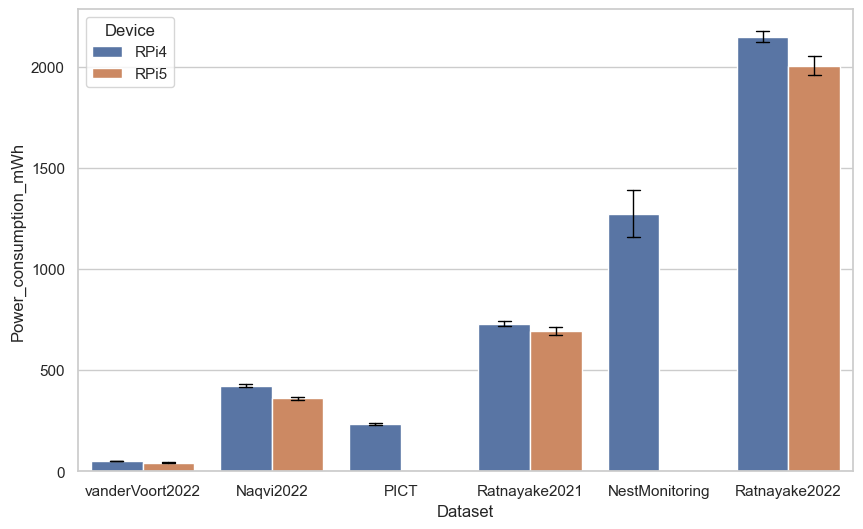

In [131]:
# Create a errorbar plot of the average power consumption vs frame count of dataset. 
# The x-axis will be the framecount and the y-axis will be the Power_consumption_mWh. The error bars will be the standard deviation of the power consumption for eacgh replicate.
# Plot the data for each device in a different color.
# Add a legend to the plot.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Dataset", y="Power_consumption_mWh", hue="Device", data=energy_data_summary, ax=ax, ci='sd', order=energy_data_summary.sort_values('Frame Count')['Dataset'], errwidth=1, capsize=0.2, errcolor='black', dodge=True)

# Set the size of the mean point
# ax.errorbar(x="Dataset", y="RPi4_Avg_PC_mWh", data=video_data_summary, fmt='o', markersize=5, color='black', hue='Device', ax=ax, zorder=3, dodge=True)



plt.show()



In [118]:
# Insert two columns to the end of video_data_summary dataframe to store Avg_Power_Consumption_mWh and std_Power_Consumption_mWh.
# video_data_summary.insert(7, 'RPi4_Avg_PC_mWh', 0)
# video_data_summary.insert(8, 'RPi4_SD_PC_mWh', 0)

# Calculate the average power consumption and standard deviation of the power consumption for each dataset for RPi5 Device from the energy_data_summary dataframe and store the values in the Avg_Power_Consumption_mWh and std_Power_Consumption_mWh columns of video_data_summary dataframe.
for index, row in video_data_summary.iterrows():

    dataset_name = row['Dataset']
    avg_power = round(energy_data_summary.loc[(energy_data_summary['Dataset'] == dataset_name) & (energy_data_summary['Device'] == 'RPi4'), 'Power_consumption_mWh'].values.mean(),3)
    std_power = round(energy_data_summary.loc[(energy_data_summary['Dataset'] == dataset_name) & (energy_data_summary['Device'] == 'RPi4'), 'Power_consumption_mWh'].values.std(),3)

    video_data_summary.loc[index, 'RPi4_Avg_PC_mWh'] = avg_power
    video_data_summary.loc[index, 'RPi4_SD_PC_mWh'] = std_power

video_data_summary


,Dataset,No. Of Videos,File Size (MB),Duration (s),Frame Count,FPS,Video Resolution,RPi4_Avg_PC_mWh,RPi4_SD_PC_mWh,Avg_Power_Consumption_mWh,std_Power_Consumption_mWh
0,Naqvi2022,3,327.48,181.41,5445,90.0,"[1920, 1080]",421.984,6.193,429.824,429.824
1,NestMonitoring,3,1303.21,2266.44,56664,75.0,"[1920, 1080]",1274.264,93.521,1406.522,1406.522
2,PICT,3,73.09,307.34,5471,54.0,"[1920, 1080]",235.166,3.724,229.908,229.908
3,Ratnayake2021,7,442.45,371.08,22269,420.0,"[1920, 1080]",730.089,9.200,742.969,742.969
4,Ratnayake2022,10,10895.05,5996.86,179912,300.0,"[1920, 1080]",2149.609,21.719,2127.332,2127.332
5,vanderVoort2022,1,23.59,32.90,790,24.0,"[1920, 1080]",49.001,0.267,49.061,49.061


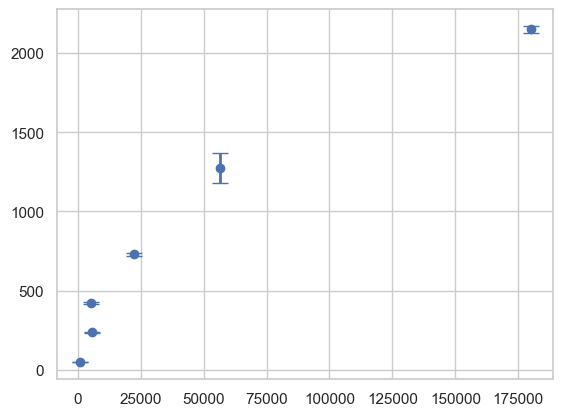

In [119]:
fig, ax = plt.subplots()

x = video_data_summary['Frame Count']
y = video_data_summary['RPi4_Avg_PC_mWh']
yerr = video_data_summary['RPi4_SD_PC_mWh']

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [117]:
energy_data_summary.loc[(energy_data_summary['Dataset'] == "PICT"), 'Power_consumption_mWh'].values.mean()

235.16648912138888

In [14]:
# Convert the dataframe to a latex table.
print(video_data_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|'))

\begin{tabular}{|c|c|c|c|c|c|c|}
\toprule
Dataset & No. Of Videos & File Size (MB) & Duration (s) & Frame Count & FPS & Video Resolution \\
\midrule
Naqvi2022 & 3 & 327.480000 & 181.410000 & 5445 & 90.000000 & [1920, 1080] \\
Ratnayake2021 & 7 & 442.450000 & 371.080000 & 22269 & 420.000000 & [1920, 1080] \\
Ratnayake2022 & 10 & 10895.050000 & 5996.860000 & 179912 & 300.000000 & [1920, 1080] \\
vanderVoort2022 & 1 & 23.590000 & 32.900000 & 790 & 24.000000 & [1920, 1080] \\
\bottomrule
\end{tabular}



### Import results of Raspberry Pi 5 tests

In [26]:
directory = "./testing/EcoMotionZip_RPi5"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            video = VideoFileClip(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log")
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576       
            if os.path.exists(log_file_path):
                with open(log_file_path, "r") as log_file:
                    lines = log_file.readlines()
                    last_line = lines[-1].strip()
                    if last_line.endswith("seconds."):
                        processing_time = last_line.split()[-2]
                    else:
                        processing_time = None
            else:
                processing_time = None
            video_info.append({
                "Video_Name_RPi5": file,
                "File_Size_(MB)_RPi5": file_size+csv_filesize,
                "Duration_RPi5": duration,
                "Frame_Count_RPi5": frame_count,
                "FPS_RPi5": fps,
                "Processing_Time_RPi5": processing_time
            })

RPi5_results = pd.DataFrame(video_info)
RPi5_results.head()

,Video_Name_RPi5,File_Size_(MB)_RPi5,Duration_RPi5,Frame_Count_RPi5,FPS_RPi5,Processing_Time_RPi5
0,08040046.avi,40.196471,59.33,1780,30.0,116.79
1,bee_test_1.avi,3.568596,13.38,803,60.0,67.65
2,cam_2_S_video_20210308_112402.h264.avi,5.523088,15.83,475,30.0,177.23
3,bee_test_6.avi,8.447001,32.43,1946,60.0,114.26
4,bee_test_7.avi,3.935311,17.30,1039,60.0,53.14


### Import results of Raspberry Pi 5 tests

In [27]:
directory = "./testing/EcoMotionZip_RPi4"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576              
            if os.path.exists(log_file_path):
                with open(log_file_path, "r") as log_file:
                    lines = log_file.readlines()
                    last_line = lines[-1].strip()
                    # print(last_line)
                    if last_line.endswith("seconds."):
                        processing_time = last_line.split()[-2]
                    else:
                        processing_time = None
            else:
                processing_time = None
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_RPi4": file,
                "File_Size_(MB)_RPi4": file_size+csv_filesize,
                "Duration_RPi4": duration,
                "Frame_Count_RPi4": frame_count,
                "FPS_RPi4": fps,
                "Processing_Time_RPi4": processing_time
            })

RPi4_results = pd.DataFrame(video_info)
RPi4_results.head()

,Video_Name_RPi4,File_Size_(MB)_RPi4,Duration_RPi4,Frame_Count_RPi4,FPS_RPi4,Processing_Time_RPi4
0,08040046.avi,40.196471,59.33,1780,30.0,246.17
1,bee_test_1.avi,3.568596,13.38,803,60.0,111.32
2,cam_2_S_video_20210308_112402.h264.avi,5.523088,15.83,475,30.0,277.21
3,bee_test_6.avi,8.447001,32.43,1946,60.0,189.43
4,bee_test_7.avi,3.935311,17.30,1039,60.0,87.77


### Result analysis

In [31]:
# Merge the three dataframes based on the video name. Ignore the extension in the video name. Sort the dataframe by the video name.
results = pd.merge(video_data, RPi5_results, left_on=video_data['Video Name'].str.split('.').str[0], right_on=RPi5_results['Video_Name_RPi5'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])
results = pd.merge(results, RPi4_results, left_on=results['Video Name'].str.split('.').str[0], right_on=RPi4_results['Video_Name_RPi4'].str.split('.').str[0], how="inner")
results = results.sort_values(by="Video Name")
results = results.drop(columns=['key_0'])

results.head()

,Video Name,file_size,duration,frame_count,fps,resolution,Video_Name_RPi5,File_Size_(MB)_RPi5,Duration_RPi5,Frame_Count_RPi5,FPS_RPi5,Processing_Time_RPi5,Video_Name_RPi4,File_Size_(MB)_RPi4,Duration_RPi4,Frame_Count_RPi4,FPS_RPi4,Processing_Time_RPi4
19,08040046.avi,109.142805,60.47,1815,30.0,"[1920, 1080]",08040046.avi,40.196471,59.33,1780,30.0,116.79,08040046.avi,40.196471,59.33,1780,30.0,246.17
18,08140020.avi,109.171209,60.47,1815,30.0,"[1920, 1080]",08140020.avi,3.022605,22.37,672,30.0,43.75,08140020.avi,3.022605,22.37,672,30.0,77.97
20,08210024.avi,109.168022,60.47,1815,30.0,"[1920, 1080]",08210024.avi,27.149517,56.47,1695,30.0,97.31,08210024.avi,27.149517,56.47,1695,30.0,179.80
10,Sup-Mat-1-reduced-video.mp4,23.593646,32.90,790,24.0,"[1920, 1080]",Sup-Mat-1-reduced-video.avi,2.448359,32.13,772,24.0,35.57,Sup-Mat-1-reduced-video.avi,2.448359,32.13,772,24.0,58.39
13,bee_test_1.mp4,66.200603,59.01,3541,60.0,"[1920, 1080]",bee_test_1.avi,3.568596,13.38,803,60.0,67.65,bee_test_1.avi,3.568596,13.38,803,60.0,111.32


### Anlysis of Video Compression

In [32]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the file size, the duration, the frame count, File size RPi5, Duration_RPi5 and number of frames RPi5 .
compression = results[['Video Name', 'file_size', 'duration', 'frame_count', 'File_Size_(MB)_RPi5', 'Duration_RPi5', 'Frame_Count_RPi5']]

# Rename the columns to make them more readable.
compression.columns = ['Video Name', 'Raw File Size (MB)', 'Raw Duration (s)', 'Raw Frame Count', 'Processed File Size (MB)', 'Processed Duration (s)', 'Processed Frame Count']

# Calculate the percentage reduction in File Size and Frame Count.
compression['File Size Reduction (%)'] = ((compression['Raw File Size (MB)'] - compression['Processed File Size (MB)']) / compression['Raw File Size (MB)']) * 100
compression['Frame Count Reduction (%)'] = ((compression['Raw Frame Count'] - compression['Processed Frame Count']) / compression['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
results_display = compression.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    compression.loc[compression['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
compression.insert(1, 'Dataset', compression['Video Name'].str.split('_').str[0])

# Display the dataframe.
compression


,Video Name,Dataset,Raw File Size (MB),Raw Duration (s),Raw Frame Count,Processed File Size (MB),Processed Duration (s),Processed Frame Count,File Size Reduction (%),Frame Count Reduction (%)
19,Naqvi2022_V1,Naqvi2022,109.142805,60.47,1815,40.196471,59.33,1780,63.170755,1.928375
18,Naqvi2022_V2,Naqvi2022,109.171209,60.47,1815,3.022605,22.37,672,97.231317,62.975207
20,Naqvi2022_V3,Naqvi2022,109.168022,60.47,1815,27.149517,56.47,1695,75.130522,6.611570
10,vanderVoort2022_V1,vanderVoort2022,23.593646,32.90,790,2.448359,32.13,772,89.622801,2.278481
13,Ratnayake2021_V1,Ratnayake2021,66.200603,59.01,3541,3.568596,13.38,803,94.609421,77.322790
12,Ratnayake2021_V2,Ratnayake2021,56.854961,49.00,2941,4.514054,18.47,1109,92.060404,62.291738
11,Ratnayake2021_V3,Ratnayake2021,70.104886,60.01,3601,5.818557,27.62,1658,91.700212,53.957234
15,Ratnayake2021_V4,Ratnayake2021,58.633543,47.02,2822,6.369395,27.13,1628,89.136943,42.310418
14,Ratnayake2021_V5,Ratnayake2021,71.279410,58.01,3481,6.632923,28.80,1729,90.694475,50.330365
16,Ratnayake2021_V6,Ratnayake2021,85.306108,71.02,4262,8.447001,32.43,1946,90.098012,54.340685


In [41]:
# Create a new dataframe name named "compression_summary" from the "compression" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw file size, processed file size, raw duration, processed duration, raw frame count and processed frame count.
compression_summary = compression.groupby(['Dataset']).sum()
compression_summary = compression_summary.reset_index()
compression_summary = compression_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
compression_summary['No. Of Videos'] = compression.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
compression_summary = compression_summary.drop(columns=['Video Name'])

# Recalculate the percentage reduction in File Size and Frame Count.
compression_summary['File Size Reduction (%)'] = ((compression_summary['Raw File Size (MB)'] - compression_summary['Processed File Size (MB)']) / compression_summary['Raw File Size (MB)']) * 100
compression_summary['Frame Count Reduction (%)'] = ((compression_summary['Raw Frame Count'] - compression_summary['Processed Frame Count']) / compression_summary['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
compression_summary = compression_summary.round(2)

# Move the No. Of Videos column after the Dataset column.
compression_summary = compression_summary[['Dataset', 'No. Of Videos', 'Raw Frame Count', 'Raw File Size (MB)', 'Processed Frame Count', 'Processed File Size (MB)', 'Frame Count Reduction (%)', 'File Size Reduction (%)', 
                                           'Raw Duration (s)', 'Processed Duration (s)']]

compression_summary

,Dataset,No. Of Videos,Raw Frame Count,Raw File Size (MB),Processed Frame Count,Processed File Size (MB),Frame Count Reduction (%),File Size Reduction (%),Raw Duration (s),Processed Duration (s)
0,Naqvi2022,3,5445,327.48,4147,70.37,23.84,78.51,181.41,138.17
1,Ratnayake2021,7,22269,442.45,9912,39.29,55.49,91.12,371.08,165.13
2,Ratnayake2022,10,179912,10895.05,12093,260.23,93.28,97.61,5996.86,402.99
3,vanderVoort2022,1,790,23.59,772,2.45,2.28,89.61,32.90,32.13


In [42]:
# Convert the dataframe to a latex table.
print(compression_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|c|c|c|'))


\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
\toprule
Dataset & No. Of Videos & Raw Frame Count & Raw File Size (MB) & Processed Frame Count & Processed File Size (MB) & Frame Count Reduction (%) & File Size Reduction (%) & Raw Duration (s) & Processed Duration (s) \\
\midrule
Naqvi2022 & 3 & 5445 & 327.480000 & 4147 & 70.370000 & 23.840000 & 78.510000 & 181.410000 & 138.170000 \\
Ratnayake2021 & 7 & 22269 & 442.450000 & 9912 & 39.290000 & 55.490000 & 91.120000 & 371.080000 & 165.130000 \\
Ratnayake2022 & 10 & 179912 & 10895.050000 & 12093 & 260.230000 & 93.280000 & 97.610000 & 5996.860000 & 402.990000 \\
vanderVoort2022 & 1 & 790 & 23.590000 & 772 & 2.450000 & 2.280000 & 89.610000 & 32.900000 & 32.130000 \\
\bottomrule
\end{tabular}



### Analysis of Processing Times

In [39]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the duration, fps, frame count Processing_Time_RPi5 and Processing_Time_RPi4 .
processing_time = results[['Video Name', 'duration', 'fps', 'frame_count', 'Processing_Time_RPi5', 'Processing_Time_RPi4']]
processing_time.columns = ['Video Name', 'Raw Video Duration (s)', 'FPS', 'Raw Video Frame Count', 'Processing Time RPi5 (s)', 'Processing Time RPi4 (s)']

# Convert the Processing_Time_RPi5 and Processing_Time_RPi4 columns to float.
processing_time['Processing Time RPi5 (s)'] = processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Time RPi4 (s)'] = processing_time['Processing Time RPi4 (s)'].astype(float)


# Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time['Processing Speed RPi5 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Speed RPi4 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi4 (s)'].astype(float)

# Round the values in the dataframe to 2 decimal places.
processing_time = processing_time.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    processing_time.loc[processing_time['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
processing_time.insert(1, 'Dataset', processing_time['Video Name'].str.split('_').str[0])

processing_time



,Video Name,Dataset,Raw Video Duration (s),FPS,Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi4 (s),Processing Speed RPi5 (fps),Processing Speed RPi4 (fps)
19,Naqvi2022_V1,Naqvi2022,60.47,30.0,1815,116.79,246.17,15.54,7.37
18,Naqvi2022_V2,Naqvi2022,60.47,30.0,1815,43.75,77.97,41.49,23.28
20,Naqvi2022_V3,Naqvi2022,60.47,30.0,1815,97.31,179.80,18.65,10.09
10,vanderVoort2022_V1,vanderVoort2022,32.90,24.0,790,35.57,58.39,22.21,13.53
13,Ratnayake2021_V1,Ratnayake2021,59.01,60.0,3541,67.65,111.32,52.34,31.81
12,Ratnayake2021_V2,Ratnayake2021,49.00,60.0,2941,70.66,114.81,41.62,25.62
11,Ratnayake2021_V3,Ratnayake2021,60.01,60.0,3601,95.69,154.36,37.63,23.33
15,Ratnayake2021_V4,Ratnayake2021,47.02,60.0,2822,83.72,141.40,33.71,19.96
14,Ratnayake2021_V5,Ratnayake2021,58.01,60.0,3481,95.71,155.37,36.37,22.40
16,Ratnayake2021_V6,Ratnayake2021,71.02,60.0,4262,114.26,189.43,37.30,22.50


In [40]:
# Create a new dataframe name named "processing_time_summary" from the "processing_time" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw video duration, Raw Video Frame Count, processing time RPi5 and processing time RPi4. Average FPS, Processing Speed RPi5 (fps) and Processing Speed RPi4 (fps) will be calculated.

processing_time_summary = processing_time.groupby(['Dataset']).sum()
processing_time_summary = processing_time_summary.reset_index()
processing_time_summary = processing_time_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
processing_time_summary['No. Of Videos'] = processing_time.groupby(['Dataset']).size().values

# Calculate the FPS by averaging total FPS by the number of videos in each dataset.
processing_time_summary['Average FPS'] = processing_time_summary['FPS'] / processing_time_summary['No. Of Videos']
# processing_time_summary['FPS'] = processing_time.groupby(['Dataset']).size().values


# Drop the  Video Name column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['Video Name'])

# # Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time_summary['Avg. Processing Speed RPi5 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi5 (s)'].astype(float)
processing_time_summary['Avg. Processing Speed RPi4 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi4 (s)'].astype(float)

# # Round the values in the dataframe to 2 decimal places.
processing_time_summary = processing_time_summary.round(2)

# Remove the FPS column from the dataframe. Move the No. Of Videos column and Average FPS column after the Dataset column.
processing_time_summary = processing_time_summary[['Dataset', 'No. Of Videos', 'Average FPS', 'Raw Video Duration (s)', 'Raw Video Frame Count', 'Processing Time RPi5 (s)', 'Processing Speed RPi5 (fps)', 'Processing Time RPi4 (s)', 'Processing Speed RPi4 (fps)']]

processing_time_summary



,Dataset,No. Of Videos,Average FPS,Raw Video Duration (s),Raw Video Frame Count,Processing Time RPi5 (s),Processing Speed RPi5 (fps),Processing Time RPi4 (s),Processing Speed RPi4 (fps)
0,Naqvi2022,3,30.0,181.41,5445,257.85,75.68,503.94,40.74
1,Ratnayake2021,7,60.0,371.08,22269,580.83,269.47,954.46,164.09
2,Ratnayake2022,10,30.0,5996.86,179912,1849.65,987.62,2940.67,616.05
3,vanderVoort2022,1,24.0,32.90,790,35.57,22.21,58.39,13.53


In [38]:
# Convert the dataframe to a latex table.
print(processing_time_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|c|c|'))

\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\toprule
Dataset & No. Of Videos & Average FPS & Raw Video Duration (s) & Raw Video Frame Count & Processing Time RPi5 (s) & Processing Speed RPi5 (fps) & Processing Time RPi4 (s) & Processing Speed RPi4 (fps) \\
\midrule
Naqvi2022 & 3 & 30.000000 & 181.410000 & 5445 & 257.850000 & 75.680000 & 503.940000 & 40.740000 \\
Ratnayake2021 & 7 & 60.000000 & 371.080000 & 22269 & 580.830000 & 269.470000 & 954.460000 & 164.090000 \\
Ratnayake2022 & 10 & 30.000000 & 5996.860000 & 179912 & 1849.650000 & 987.620000 & 2940.670000 & 616.050000 \\
vanderVoort2022 & 1 & 24.000000 & 32.900000 & 790 & 35.570000 & 22.210000 & 58.390000 & 13.530000 \\
\bottomrule
\end{tabular}



In [ ]:
# Get numpy version
import numpy as np
np.__version__

# Get pandas version
import pandas as pd
pd.__version__

# Get opnecv version
import cv2
cv2.__version__

# Get python version
import sys
sys.version

# Get ffmpeg version
import subprocess
cmd = "ffmpeg -version"
returned_output = subprocess.check_output(cmd)
print(returned_output.decode("utf-8"))
